In [4]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import random
from collections import Counter
np.random.seed(0)
random.seed(0)
ran=0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope



import seaborn as sn
import pandas as pd
from sklearn.utils import class_weight

In [3]:
 featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
             'skew_mean' , 'kurt_mean' ,'entro',\
             'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                 'mean(spo2)' ,'std(spo2)', 'percent(SpO2)', 'min(SpO2)']
 
featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                    'Cor(br)','SD(br)','Cor(pp)','SD(pp)',\
                    'Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                    'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
            

In [5]:
Folder=r"C:\Users\zz587-admin\Documents\sleep center\CNN_algorithm\Output"
Data_ver=r'\Feat_detect_v3'
Folder=Folder + Data_ver 
#Folder=r"C:\Users\zz587-admin\Documents\sleep center\result\OutputFeat_predv2"
path=Folder+r'\featureAll'+Data_ver+"_feature_data.mat"


# result from old  version data  Folder:'result'
# Folder=r"C:\Users\zz587-admin\Documents\sleep center\result"
# Data_ver=r'\OutputFeatv5'
# Folder=Folder + Data_ver 
# #Folder=r"C:\Users\zz587-admin\Documents\sleep center\result\OutputFeat_predv2"
# path=Folder+r'\featureAll'+r"\DataAll.mat"


data = sio.loadmat(path)

featureNCS = data['featureNCS']
featureNCS=np.nan_to_num(featureNCS, nan=0,posinf=1000)
featureNCS=np.delete(featureNCS,np.arange(16,37),1)
featureNCS_wo = featureNCS[:,0:-4]
labelNCS = data['labelNCS']
labelNCS_2 = data['labelNCS_2']
labelNCS_3 = data['labelNCS_3']
labelNCS_4 = data['labelNCS_4']

featurePSG = data['featurePSG']
featurePSG=np.nan_to_num(featurePSG, nan=0,posinf=1000)
featurePSG_wo = featurePSG[:,0:-4]
labelPSG = data['labelPSG']
labelPSG_2 = data['labelPSG_2']

featurePSG2= data['featurePSG2']
featurePSG2=np.nan_to_num(featurePSG2, nan=0,posinf=1000)
featurePSG2_wo = featurePSG2[:,0:-4]
labelPSG2 = data['labelPSG2'].ravel()
labelPSG2_2 = data['labelPSG2_2']
labelPSG2_3 = data['labelPSG2_3']
labelPSG2_4 = data['labelPSG2_4']
caseNumNCS=data['caseNumNCS']
caseNumPSG=data['caseNumPSG']
caseNumPSG2=data['caseNumPSG2']



#delete some bad cases 
# idx_del=np.where( caseNumNCS != 2 )[0]  
# caseNumNCS_del=caseNumNCS[idx_del]
# featureNCS_del=featureNCS[idx_del,:]
# featureNCS_wo_del=featureNCS_wo[idx_del,:]
# labelNCS_3_del = labelNCS_3[idx_del]  

# a=np.unique(labelNCS_3_del)

In [6]:


#function for k-fold CV. 
# return  y  =(truth,predict),  acc_all = all accuracy of all folds  ,acc =  mean accuracy ,cm = all data's confusion matrix ,featureName2,importance2 =average feat imp


#opt[0]  = 1 use balanced sample weight   opt[0]  = 0  not use balanced sample weight 
def k_foldCV(x,y,opt,w):
    rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1,random_state=0)
    #b=20
    b=15
    num=50
    y=y.ravel()
    # x_ = preprocessing.StandardScaler().fit_transform(x)
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    
    bal='balanced'
    

    if x.shape[1]==20 or x.shape[1]==16:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    else:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                    'skew_mean' , 'kurt_mean' ,'entro',\
                    'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                        'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                        'Cor(br)','SD(br)','Cor(pp)','SD(pp)','Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                        'psd(1)','psd(2)','psd(3)','psd(4)','fmax(1)','fmax(2)','fmax(3)','fmax(4)',\
                        'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']

    # featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
    #             'skew_mean' , 'kurt_mean' ,'entro',\
    #             'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
    #                 'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    
    for train_ind, test_ind in rkf.split(x,y):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        
        
        
        #balance the sample 
        if opt[0]==1:
            s=class_weight.compute_sample_weight(w,y_train)            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight=w).fit(X_train,y_train,sample_weight=s)
        if opt[0]==0:            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0).fit(X_train,y_train)
        #clf = SVC(C=3, kernel="rbf").fit(X_train,y_train)
        y_p = clf.predict(X_test)
        acc=accuracy_score(y_test, y_p)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)

        impt_temp=clf.feature_importances_
        impt.append(impt_temp)
    #clf = RandomForestClassifier(max_depth=5,n_estimators=50,max_features=None,random_state=ran).fit(X_train,y_train)
    # clf = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)


    impt=np.array(impt) 
    importance2=np.mean(impt,axis=0)
    seq=np.argsort(importance2)
    featureName=np.array(featureName)
    featureName2=featureName[seq]
    importance2=importance2[seq]
    importance2=np.flip(importance2)
    featureName2=np.flip(featureName2)


    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
    print(acc)
    print(cm)
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        pre=cm[1,1]/(cm[1,1]+cm[0,1])
        
        print('sen=' + str(round(sen, 3)) + ' pre=' + str(round(pre, 3)))  


    return y,acc_all,acc,cm,featureName2,importance2


#function for subject-independent CV.  
#input: x=features y=labels  group= case group 
# return  y  =(truth,predict),  acc_all = all accuracy for all cases  ,acc =  mean accuracy ,cm = all data's confusion matrix ,featureName2,importance2 =average feat imp

def groupCV(x,y,group,opt,w):
    a=5
    b=10
    num=50
    rkf = LeaveOneGroupOut()
    
    if x.shape[1]==20 or x.shape[1]==16:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                'skew_mean' , 'kurt_mean' ,'entro',\
                'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                    'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    else:
        featureName=['mean(br)', 'std(br)', 'mean(pp)' ,'std(pp)' ,'mean(in)' ,'std(in)' ,'mean(ex)' ,'std(ex)',\
                    'skew_mean' , 'kurt_mean' ,'entro',\
                    'per_power', 'cycle', 'covBR' ,'covPP', 'void_t',\
                        'max(in)','max(ex)','max(br)','min(br)','min(pp)',\
                        'Cor(br)','SD(br)','Cor(pp)','SD(pp)','Cor(in)','SD(in)','Cor(ex)','SD(ex)',\
                        'psd(1)','psd(2)','psd(3)','psd(4)','fmax(1)','fmax(2)','fmax(3)','fmax(4)',\
                        'mean(spo2)' ,'std(spo2)', 'percent(spo2)', 'min(spo2)']
    # x=x_
    y_p_all=[]
    y_test_all=[]
    acc_all=[]
    impt=[]
    y=y.ravel()
    group=group.ravel()
   
    
    for train_ind, test_ind in rkf.split(x,y,group):
        
        X_train=x[train_ind] 
        X_test=x[test_ind]
        y_train=y[train_ind] 
        y_test=y[test_ind]
        
                    
        if opt[0]==1:
            s=class_weight.compute_sample_weight(w,y_train)            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0,class_weight=w).fit(X_train,y_train,sample_weight=s)
        if opt[0]==0:            
            clf = RandomForestClassifier(max_depth=b,n_estimators=num,max_features=None,random_state=0).fit(X_train,y_train)
        
        y_p = clf.predict(X_test)
        acc=accuracy_score(y_test, y_p)
        
        
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        
        acc_all.append(acc)
        

        impt_temp=clf.feature_importances_
        impt.append(impt_temp)



    impt=np.array(impt) 
    importance2=np.mean(impt,axis=0)
    seq=np.argsort(importance2)
    featureName=np.array(featureName)
    featureName2=featureName[seq]
    importance2=importance2[seq]
    importance2=np.flip(importance2)
    featureName2=np.flip(featureName2)

    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
    print(acc)
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        pre=cm[1,1]/(cm[1,1]+cm[0,1])
        print('sen=' + str(round(sen, 3)) + ' pre=' + str(round(pre, 3)))  
    

    return y,acc_all,acc,cm,featureName2,importance2



# get sensitivity and precision from confusion matrix 
def cm_parameter(cm):
    if len(cm)==2:
        sen=cm[1,1]/(cm[1,1]+cm[1,0])
        pre=cm[1,1]/(cm[1,1]+cm[0,1])
        
    print('sen=' + str(round(sen, 3)) + ' pre=' + str(round(pre, 3)))    
    return sen,pre


In [10]:




y1,acc_all1,acc1,cm1,feat1,impt1=k_foldCV(featureNCS,labelNCS_3,opt2,w1)
y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo,labelNCS_3,opt2,w2)
y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featurePSG2,labelPSG2_3,opt2,w1)
y4,acc_all4,acc4,cm4,feat4,impt4=k_foldCV(featurePSG2_wo,labelPSG2_3,opt2,w2)


0.8899277236257542
[[18225  2102]
 [ 1218  8617]]
sen=0.876 pre=0.804
0.4182414959220211
[[ 3269 17058]
 [  489  9346]]
sen=0.95 pre=0.354
0.8586516853932584
[[11824  1515]
 [ 1001  3460]]
sen=0.776 pre=0.695
0.6293820224719101
[[7342 5997]
 [ 600 3861]]
sen=0.866 pre=0.392


In [16]:
opt1=[0]
opt2=[1]
w1={0:1,1:5}  
w2={0:1,1:2}
y1,acc_all1,acc1,cm1,feat1,impt1=k_foldCV(featureNCS,labelNCS_3,opt2,w1)
y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo,labelNCS_3,opt2,w2)

0.8383814320718759
[[15659  3945]
 [  804  8976]]
sen=0.918 pre=0.695
0.8385175605771849
[[18129  1475]
 [ 3270  6510]]
sen=0.666 pre=0.815


In [7]:
# evaluation different labelling methods  balanced weight opt =[0]
opt1=[0]
opt2=[1]
w1={0:1,1:6}  
w2={0:1,1:6}
y1,acc_all1,acc1,cm1,feat1,impt1=k_foldCV(featureNCS,labelNCS_2,opt1,w1)
y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo,labelNCS_2,opt1,w2)
# y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featurePSG2,labelPSG2_2,opt1,w1)
# y4,acc_all4,acc4,cm4,feat4,impt4=k_foldCV(featurePSG2_wo,labelPSG2_2,opt1,w2)
# y1,acc_all1,acc1,cm1,feat1,impt1=k_foldCV(featureNCS,labelNCS,opt1,w1)
# y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo,labelNCS,opt1,w2)
# y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featurePSG2,labelPSG2,opt1,w1)
# y4,acc_all4,acc4,cm4,feat4,impt4=k_foldCV(featurePSG2_wo,labelPSG2,opt1,w2)

0.8982826072541609
[[18740    15  1056]
 [  223   181   112]
 [ 1625    37  8173]]
0.8429149260659108
[[19345    10   456]
 [  282    99   135]
 [ 3839    16  5980]]


In [8]:
# detect outlier in normal epoch & disorder epoch. 
# use featureNCS (include SpO2) as unsupervised method data for outlier detection 
#  opt0  outlier model selection for normal 
#  opt1  outlier model selection for disorder
# a = [a0 , a1] rate for deletion of outlier 
# b = 1: use featureNCS (include SpO2) 2 : use featureNCS_wo  
def Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,opt0,opt1,a,b):
    a0=a[0]   # outlier rate for normal epoch
    a1=a[1]   # outlier rate for disorder epoch

    idx_0=np.where( labelNCS_3 == 0 )[0]  
    caseNumNCS_0=caseNumNCS[idx_0]
    featureNCS_0=featureNCS[idx_0,:]
    featureNCS_wo_0=featureNCS_wo[idx_0,:]
    labelNCS_3_0 = labelNCS_3[idx_0]
    labelNCS_0 = labelNCS[idx_0]




    idx_1=np.where( labelNCS_3 == 1 )[0]  
    caseNumNCS_1=caseNumNCS[idx_1]
    featureNCS_1=featureNCS[idx_1,:]
    featureNCS_wo_1=featureNCS_wo[idx_1,:]
    labelNCS_3_1 = labelNCS_3[idx_1] 
    labelNCS_1 = labelNCS[idx_1] 

    # different outlier methods (4)
    # clf=OneClassSVM(nu=0.25)
    # clf=EllipticEnvelope(contamination=0.1)
    # clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    if opt0=='forest':
        clf0 =IsolationForest(contamination=a0,random_state=0)
    if opt0=='local':
        clf0 =LocalOutlierFactor(n_neighbors=50, contamination=a0)
    if opt0=='SVM':
        clf0 =OneClassSVM(nu=a0)
    if opt0=='covar':
        clf0 =EllipticEnvelope(contamination=a0)
 

 
    if b==1:
        lier_0 = clf0.fit_predict(featureNCS_0)
    if b==2:
        lier_0 = clf0.fit_predict(featureNCS_wo_0)    
    # 1 inlier, -1 outlier

    #delete some bad cases in 0 label    idx_0_del: after delete outliers, remaining index 
    idx_0_del=np.where( lier_0 == 1 )[0]  
    caseNumNCS_0_del=caseNumNCS_0[idx_0_del]
    featureNCS_0_del=featureNCS_0[idx_0_del,:]
    featureNCS_wo_0_del=featureNCS_wo_0[idx_0_del,:]
    labelNCS_3_0_del = labelNCS_3_0[idx_0_del]
    labelNCS_0_del = labelNCS_0[idx_0_del]

    if a1!=0:
        if opt1=='forest':
            clf1 =IsolationForest(contamination=a1,random_state=0)
        if opt1=='local':
            clf1 =LocalOutlierFactor(n_neighbors=50, contamination=a1)
        if opt1=='SVM':
            clf1 =OneClassSVM(nu=a1)
        if opt1=='covar':
            clf1 =EllipticEnvelope(contamination=a1)
        if b==1:
            lier_1 = clf1.fit_predict(featureNCS_1)
        if b==2:
            lier_1 = clf1.fit_predict(featureNCS_wo_1)
        # 1 inlier, -1 outlier

        #delete some bad cases in 1 label 
        idx_1_del=np.where( lier_1 == 1 )[0]

    # if not delete outlier in disorder 
    if a1==0:
        idx_1_del=np.arange(0,len(caseNumNCS_1))

    caseNumNCS_1_del=caseNumNCS_1[idx_1_del]
    featureNCS_1_del=featureNCS_1[idx_1_del,:]
    featureNCS_wo_1_del=featureNCS_wo_1[idx_1_del,:]
    labelNCS_3_1_del = labelNCS_3_1[idx_1_del]
    labelNCS_1_del = labelNCS_1[idx_1_del]


    featureNCS_del=np.vstack((featureNCS_0_del,featureNCS_1_del))
    featureNCS_wo_del=np.vstack((featureNCS_wo_0_del,featureNCS_wo_1_del))
    caseNumNCS_del=np.vstack((caseNumNCS_0_del,caseNumNCS_1_del))
    labelNCS_3_del=np.vstack((labelNCS_3_0_del,labelNCS_3_1_del))
    labelNCS_del=np.vstack((labelNCS_0_del,labelNCS_1_del))


    return featureNCS_del,featureNCS_wo_del,caseNumNCS_del,labelNCS_3_del,labelNCS_del


In [9]:
## delete some data with bad performance 
# test over deleted data 
opt1=[0]
opt2=[1]
w1={0:1,1:3}
w2={0:1,1:5}

# featureNCS=np.delete(featureNCS,np.arange(16,37),1)
# featureNCS_wo = featureNCS[:,0:-4]

r=np.array([0.2,0])
featureNCS_del1,featureNCS_wo_del1,caseNumNCS_del1,labelNCS_3_del1,labelNCS_del1=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'forest','forest',r,1)
featureNCS_del2,featureNCS_wo_del2,caseNumNCS_del2,labelNCS_3_del2,labelNCS_del2=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'local','local',r,1)
featureNCS_del3,featureNCS_wo_del3,caseNumNCS_del3,labelNCS_3_del3,labelNCS_del3=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'SVM','SVM',r,1)
featureNCS_del4,featureNCS_wo_del4,caseNumNCS_del4,labelNCS_3_del4,labelNCS_del4=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'covar','covar',r,1)
# y1,acc_all1,acc1,cm1,feat1,impt1=k_foldCV(featureNCS_del,labelNCS_3_del,opt2,w1)
# y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS,labelNCS_3,opt2,w1)
#y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del1,labelNCS_3_del1,opt2,w2)


y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del2,labelNCS_3_del2,opt2,w2)
# y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del3,labelNCS_3_del3,opt2,w2)
# y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del4,labelNCS_3_del4,opt2,w2)
y4,acc_all4,acc4,cm4,feat4,impt4=k_foldCV(featureNCS,labelNCS_3,opt2,w2)



0.8773375229920294
[[13882  2379]
 [  822  9013]]
sen=0.916 pre=0.791
0.8387706385518202
[[16301  4026]
 [  837  8998]]
sen=0.915 pre=0.691


In [15]:
w2={0:1,1:3.5}
y2,acc_all2,acc2,cm2,feat2,impt2=groupCV(featureNCS_del2,labelNCS_3_del2,caseNumNCS_del2,opt2,w2)

0.8458767627222563
sen=0.922 pre=0.736


In [14]:
## delete some data with bad performance 
# test over deleted data 
opt1=[0]
opt2=[1]
w1={0:1,1:3}
w2={0:1,1:5}

# featureNCS=np.delete(featureNCS,np.arange(16,37),1)
# featureNCS_wo = featureNCS[:,0:-4]

r=np.array([0.2,0])
featureNCS_del1,featureNCS_wo_del1,caseNumNCS_del1,labelNCS_3_del1,labelNCS_del1=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'forest','forest',r,1)
featureNCS_del2,featureNCS_wo_del2,caseNumNCS_del2,labelNCS_3_del2,labelNCS_del2=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'local','local',r,1)
featureNCS_del3,featureNCS_wo_del3,caseNumNCS_del3,labelNCS_3_del3,labelNCS_del3=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'SVM','SVM',r,1)
featureNCS_del4,featureNCS_wo_del4,caseNumNCS_del4,labelNCS_3_del4,labelNCS_del4=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'covar','covar',r,1)
# y1,acc_all1,acc1,cm1,feat1,impt1=k_foldCV(featureNCS_del,labelNCS_3_del,opt2,w1)
# y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS,labelNCS_3,opt2,w1)
#y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del1,labelNCS_3_del1,opt2,w2)


y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del2,labelNCS_3_del2,opt2,w2)
# y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del3,labelNCS_3_del3,opt2,w2)
# y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_del4,labelNCS_3_del4,opt2,w2)
y4,acc_all4,acc4,cm4,feat4,impt4=k_foldCV(featureNCS,labelNCS_3,opt2,w2)

0.8727565487177473
[[13229  2454]
 [  786  8994]]
sen=0.92 pre=0.786
0.8383814320718759
[[15659  3945]
 [  804  8976]]
sen=0.918 pre=0.695


sen=0.916 pre=0.791
sen=0.915 pre=0.691


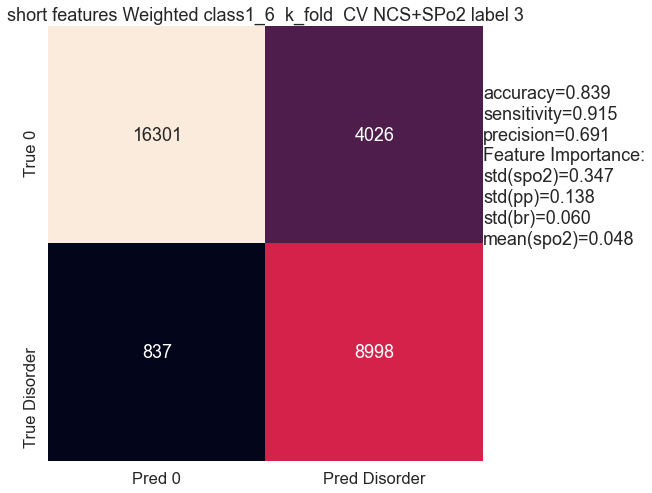

In [16]:
sen3,pre3=cm_parameter(cm3)
sen4,pre4=cm_parameter(cm4)
cm=cm3
acc=acc3
feat=feat3
impt=impt3
sen=sen3
pre=pre3
cm=cm4
acc=acc4
feat=feat4
impt=impt4
sen=sen4
pre=pre4
CVmethod='short features Weighted class1_6  k_fold Outlier Removed(0.2) Isolation Forest'
CVmethod='short features Weighted class1_6  k_fold '
#CVmethod='Add features Weighted class1_6  k_fold  Outlier Removed(0.15) Isolation Forest '
#CVmethod='Weighted class1_3  subject-independent'
labelNum=str(3)  #labelling method 1,2,3,4
size=18
name1=["True 0", "True Disorder"]
name2=["Pred 0", "Pred Disorder"]
# name1=["True 0", "True Snore","True Disorder"]
# name2=["Pred 0", "Pred Snore","Pred Disorder"]
w=12 #fig size 1      change when label num change
h=8   #fig size 2
a=2   #txt position 1   change when label num change
b=1   #txt position 2


df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen,n12=pre,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS+SPo2 label '+ labelNum
plt.title(tle)

figure = plt.gcf()
figure.set_size_inches(w, h)

plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)

In [14]:
#outlier removal optimization for NCS data only 


w1={0:1,1:3}
r=np.array([0.15,0])
featureNCS_del1,featureNCS_wo_del1,caseNumNCS_del1,labelNCS_3_del1,labelNCS_del1=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'forest','forest',r,1)
featureNCS_del2,featureNCS_wo_del2,caseNumNCS_del2,labelNCS_3_del2,labelNCS_del2=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'local','local',r,1)
featureNCS_del3,featureNCS_wo_del3,caseNumNCS_del3,labelNCS_3_del3,labelNCS_del3=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'SVM','SVM',r,2)
featureNCS_del4,featureNCS_wo_del4,caseNumNCS_del4,labelNCS_3_del4,labelNCS_del4=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'covar','covar',r,2)
y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_wo_del1,labelNCS_3_del1,opt2,w1)
y3,acc_all3,acc3,cm3,feat3,impt3=k_foldCV(featureNCS_wo_del2,labelNCS_3_del2,opt2,w1)
y4,acc_all4,acc4,cm4,feat4,impt4=k_foldCV(featureNCS_wo,labelNCS_3,opt2,w1)

0.805517648360565
[[15020  2258]
 [ 3015  6820]]
sen=0.693 pre=0.751
0.7759377420425626
[[13965  3313]
 [ 2762  7073]]
sen=0.719 pre=0.681
0.7963331344075326
[[17285  3042]
 [ 3101  6734]]
sen=0.685 pre=0.689


In [ ]:
# group CV  subject -independent 

opt1=[0]
opt2=[1]
w1={0:1,1:3}
w2={0:1,1:3}
y1,acc_all1,acc1,cm1,feat1,impt1=groupCV(featureNCS,labelNCS_3,caseNumNCS,opt2,w1)
y2,acc_all2,acc2,cm2,feat2,impt2=groupCV(featureNCS_wo,labelNCS_3,caseNumNCS,opt2,w2)
y3,acc_all3,acc3,cm3,feat3,impt3=groupCV(featureNCS_del2,labelNCS_3_del2,caseNumNCS_del2,opt2,w1)
y4,acc_all4,acc4,cm4,feat4,impt4=groupCV(featureNCS_wo_del2,labelNCS_3_del2,caseNumNCS_del2,opt2,w2)
#y3,acc_all3,acc3,cm3,feat3,impt3=groupCV(featurePSG2,labelPSG2_3,caseNumPSG2,opt2,w1)
#y4,acc_all4,acc4,cm4,feat4,impt4=groupCV(featurePSG2_wo,labelPSG2_3,caseNumPSG2,opt2,w2)
print(cm1)
print(cm2)

In [14]:
# get sensitivity and precision from confusion matrix 
sen1,pre1=cm_parameter(cm1)
sen2,pre2=cm_parameter(cm2)
sen3,pre3=cm_parameter(cm3)
sen4,pre4=cm_parameter(cm4)



sen=0.883 pre=0.763
sen=0.637 pre=0.789
sen=0.805 pre=0.644
sen=0.569 pre=0.53


In [ ]:
w1={0:1,1:3}
y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo_del1,labelNCS_3_del1,opt2,w1)
#y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo_del2,labelNCS_3_del2,opt2,w1)
sen2,pre2=cm_parameter(cm2)


cm=cm2
acc=acc2
feat=feat2
impt=impt2
sen=sen2
pre=pre2
CVmethod='Weighted class1_3  k-fold  Outlier Removed(0.15) Forest'
#CVmethod='Weighted class1_3  subject-independent'
labelNum=str(3)  #labelling method 1,2,3,4
size=18
name1=["True 0", "True Disorder"]
name2=["Pred 0", "Pred Disorder"]
# name1=["True 0", "True Snore","True Disorder"]
# name2=["Pred 0", "Pred Snore","Pred Disorder"]
w=12 #fig size 1      change when label num change
h=8   #fig size 2
a=2   #txt position 1   change when label num change
b=1   #txt position 2


df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen,n12=pre,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS  label '+ labelNum
plt.title(tle)

figure = plt.gcf()
figure.set_size_inches(w, h)

plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)

0.8442671898993346
[[14811  1175]
 [ 2476  4982]]
sen=0.668 pre=0.809
sen=0.668 pre=0.809


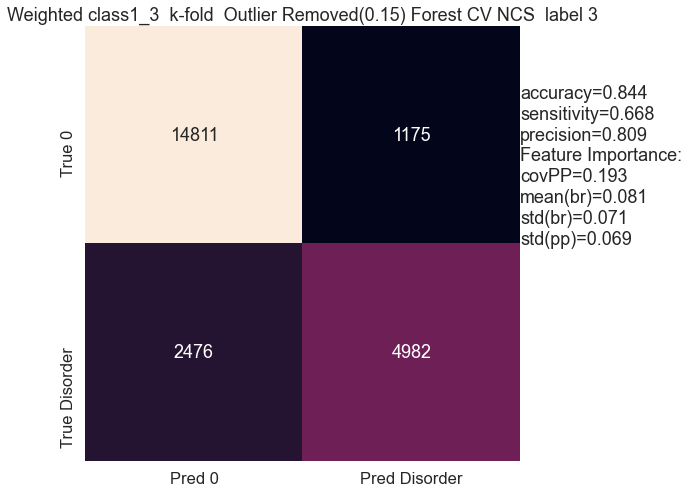

In [28]:

sen2,pre2=cm_parameter(cm2)


cm=cm2
acc=acc2
feat=feat2
impt=impt2
sen=sen2
pre=pre2

def plotFig(cm,acc,feat,impt,CVmethod,tle):
    labelNum=str(3)  #labelling method 1,2,3,4
    size=18
    name1=["True 0", "True 1"]
    name2=["Pred 0", "Pred 1"]
    
    w=8 #fig size 1      change when label num change
    h=6   #fig size 2

    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.figure()
    sn.set(font_scale=1.5)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
    plt.text(a,b,s01,fontsize=size)

    tleSave=CVmethod+' CV NCS  label '+ labelNum
    plt.title(tle)
    figure = plt.gcf()
    figure.set_size_inches(w, h)
    
    FolderSave=
    plt.savefig(FolderSave+r"/"+tle+".png", dpi=300)

0.8689063680398169
[[14107     7     0   358     2     0     0]
 [  218   143     0    32     1     0     0]
 [  152     0     2    23     0     0     0]
 [  805    13     3  4429   236     0    22]
 [   86     0     1   721   797     1    11]
 [    0     0     0    18    36     3     5]
 [   34     1     0   142    22     0    72]]


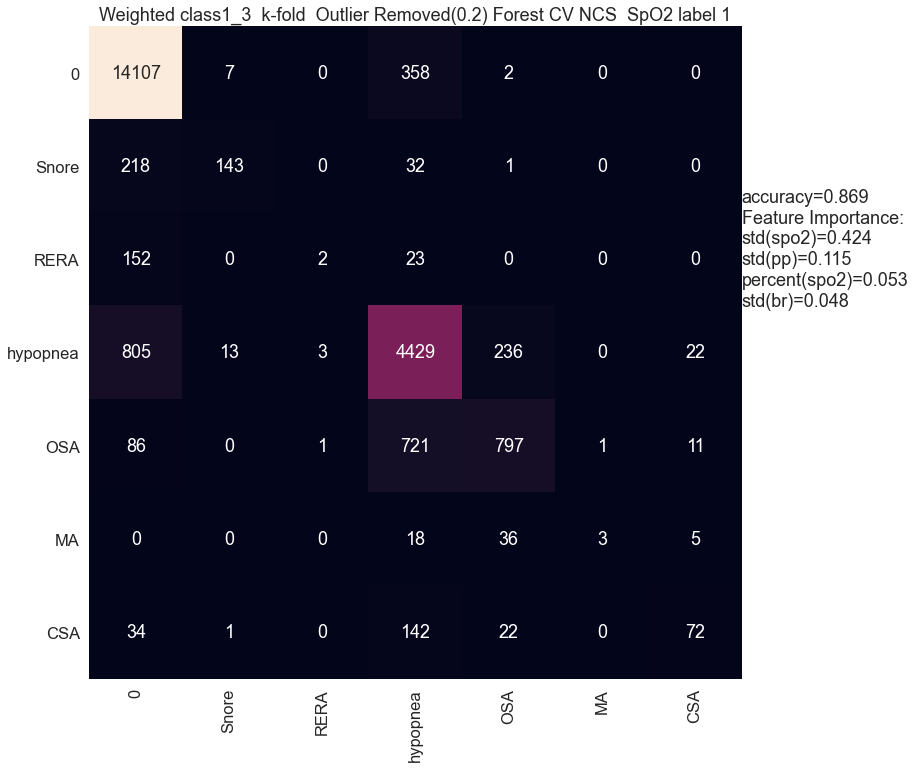

In [31]:
r=np.array([0.2,0])
featureNCS_del1,featureNCS_wo_del1,caseNumNCS_del1,labelNCS_3_del1,labelNCS_del1=\
    Del_outlier(featureNCS,featureNCS_wo,labelNCS,labelNCS_3,caseNumNCS,'forest','forest',r,1)

y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_del1,labelNCS_del1,opt1,w1)
#y2,acc_all2,acc2,cm2,feat2,impt2=k_foldCV(featureNCS_wo_del2,labelNCS_3_del2,opt2,w1)



cm=cm2
acc=acc2
feat=feat2
impt=impt2

CVmethod='Weighted class1_3  k-fold  Outlier Removed(0.2) Forest'
#CVmethod='Weighted class1_3  subject-independent'
labelNum=str(1)  #labelling method 1,2,3,4
size=18
name1=["0", "Snore","RERA","hypopnea","OSA","MA","CSA"]
name2=name1
w=20  #fig size 1  =15    =20 (label1)
h=12  #fig size 2  =8    =12 (label1)
a=7   #txt position 1   change when label num change  a=3 when 3 class; a=2 when 2class  =7 (label1)
b=3   #txt position 2



df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS  SpO2 label '+ labelNum
plt.title(tle)

figure = plt.gcf()
figure.set_size_inches(w, h)

plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)

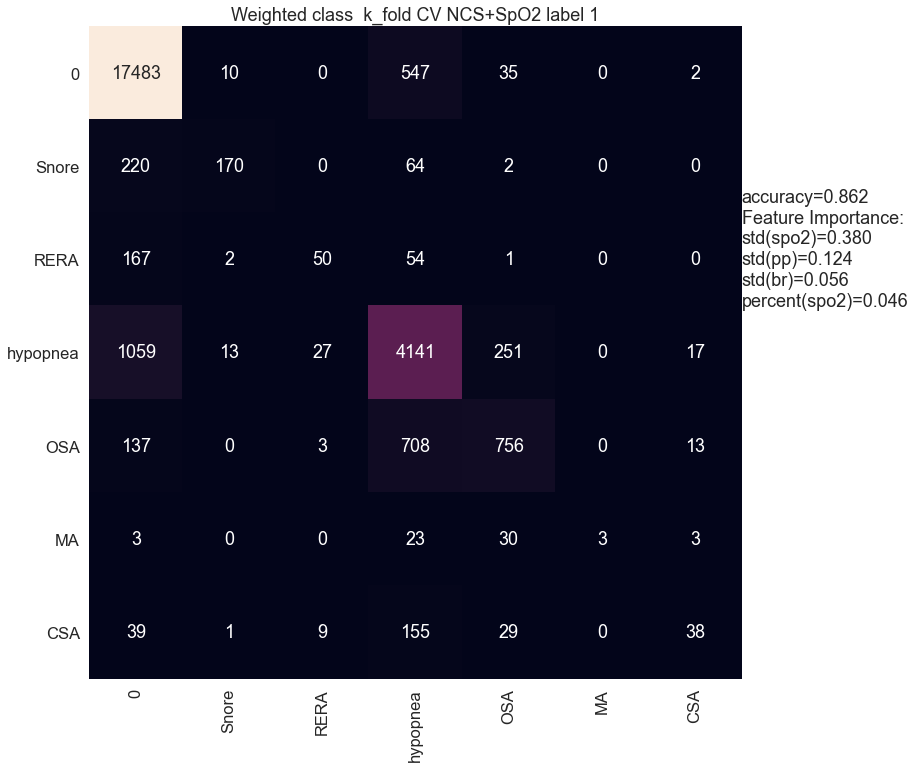

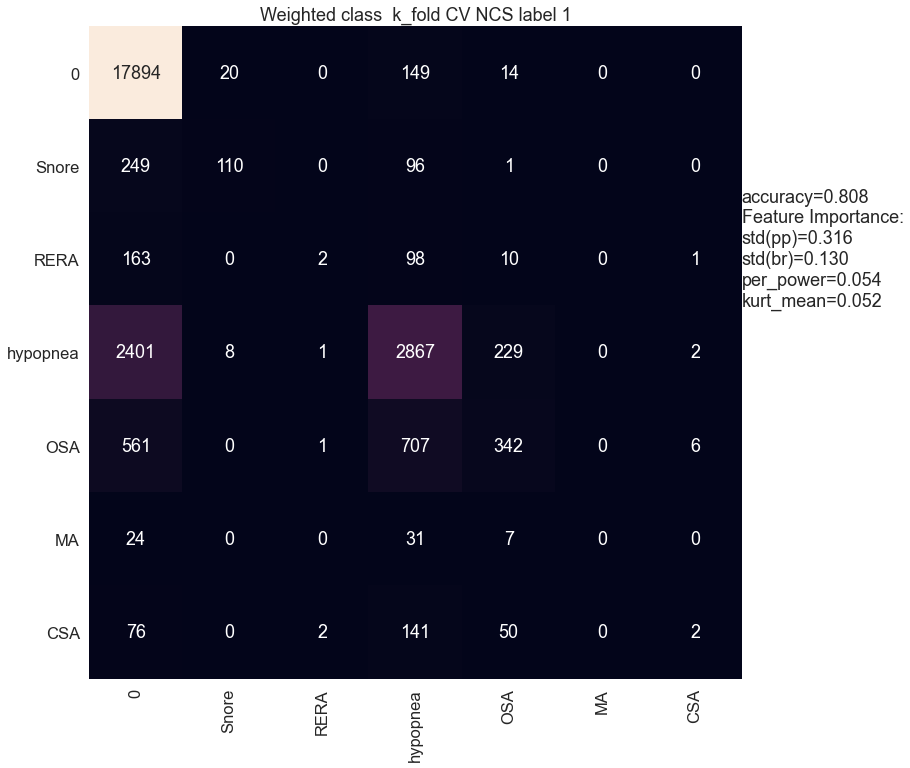

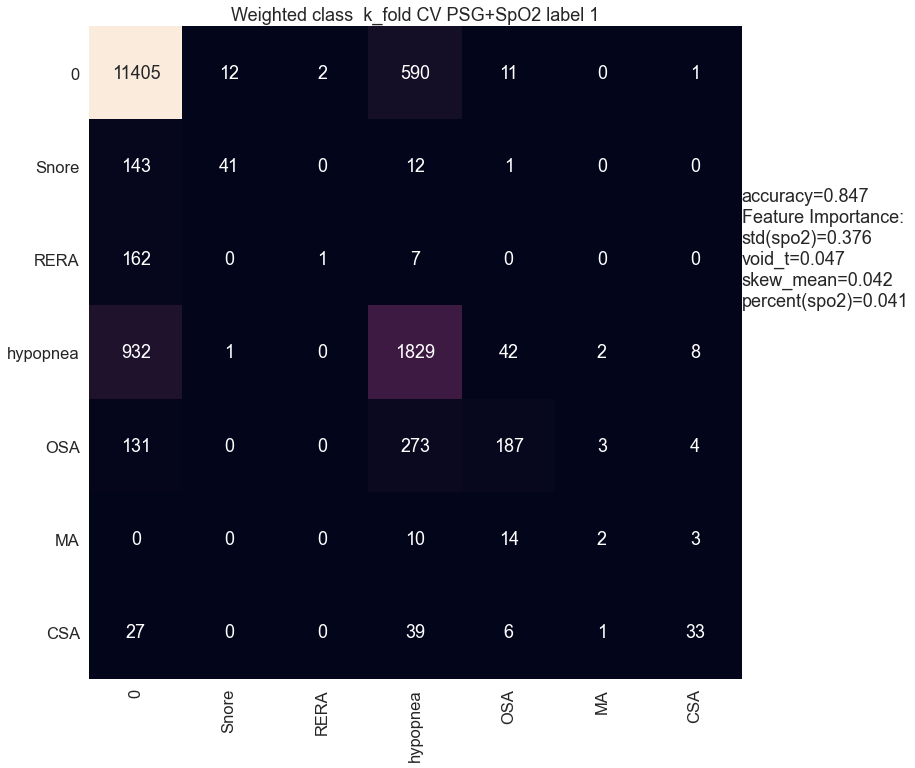

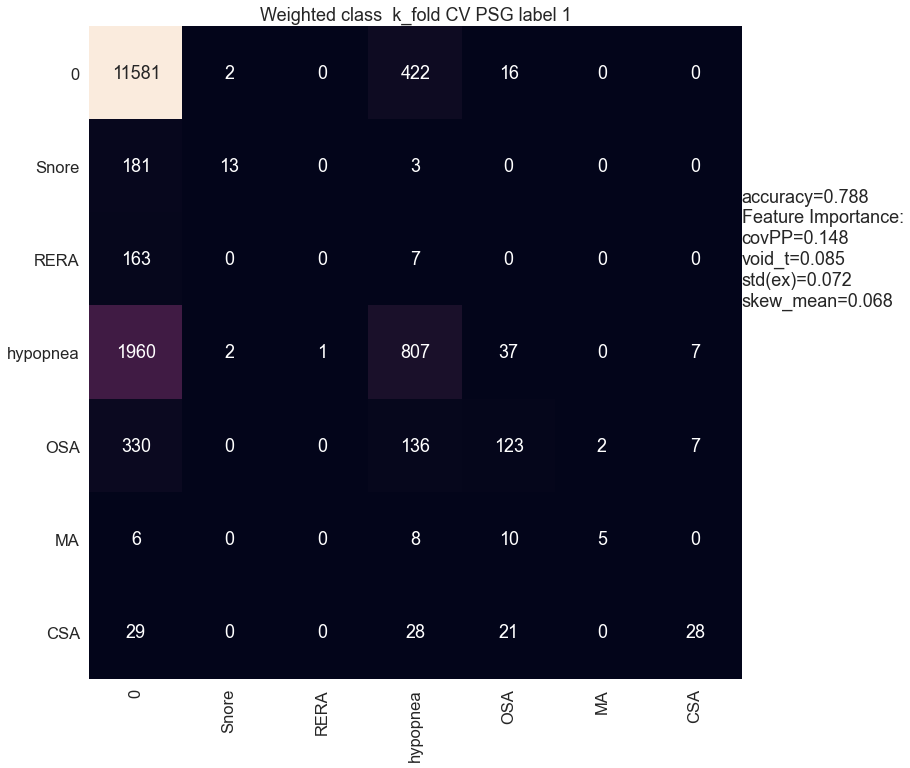

In [20]:

CVmethod='Weighted class  k_fold'
#CVmethod='Weighted class1_3  subject-independent'
labelNum=str(1)  #labelling method 1,2,3,4
size=18
name1=["0", "Snore","RERA","hypopnea","OSA","MA","CSA"]
name2=name1
w=20  #fig size 1  =15    =20 (label1)
h=12  #fig size 2  =8    =12 (label1)
a=7   #txt position 1   change when label num change  a=3 when 3 class; a=2 when 2class  =7 (label1)
b=3   #txt position 2


cm=cm1
acc=acc1
feat=feat1
impt=impt1

df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS+SpO2 label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)

plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)




cm=cm2
acc=acc2
feat=feat2
impt=impt2
df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
sn.set(font_scale=1.5)
s01='accuracy={n:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)
plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)


cm=cm3
acc=acc3
feat=feat3
impt=impt3
df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
sn.set(font_scale=1.5)
s01='accuracy={n:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV PSG+SpO2 label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)
plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)


cm=cm4
acc=acc4
feat=feat4
impt=impt4
df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
sn.set(font_scale=1.5)
s01='accuracy={n:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV PSG label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)
plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)


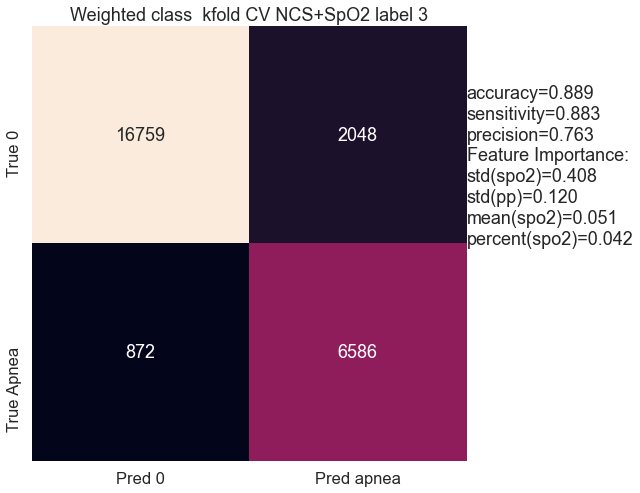

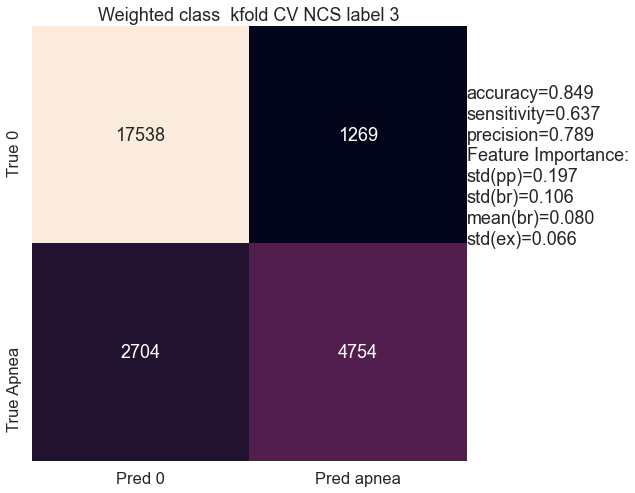

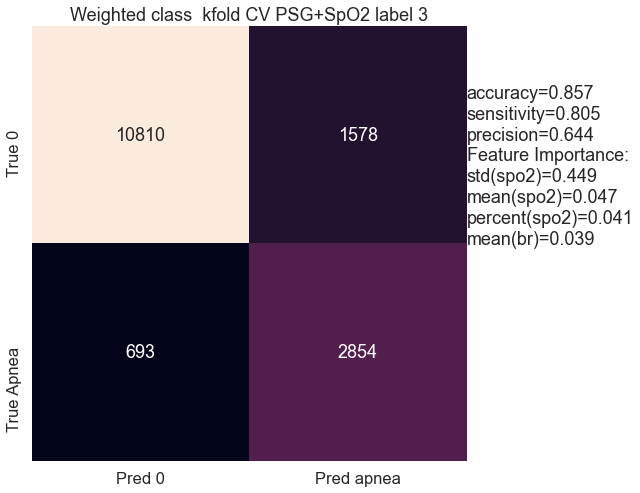

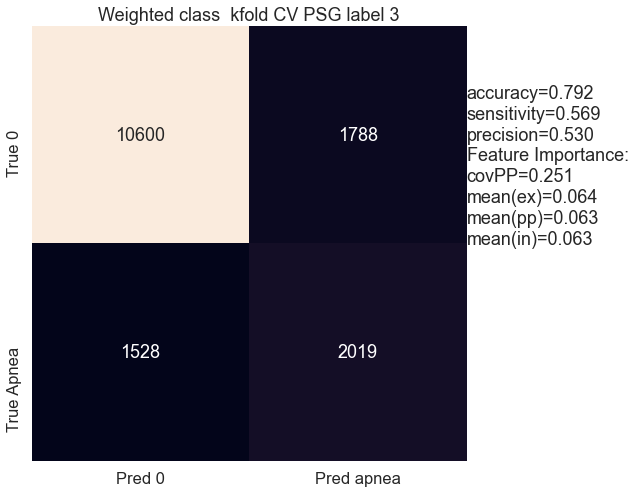

In [15]:
CVmethod='Weighted class  kfold'
labelNum=str(3)  #labelling method 1,2,3,4
size=18
name1=["True 0", "True Apnea"]
name2=["Pred 0", "Pred apnea"]
w=12 #fig size 1      change when label num change
h=8   #fig size 2
a=2   #txt position 1   change when label num change
b=1   #txt position 2
cm=cm1
acc=acc1
feat=feat1
impt=impt1

df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen1,n12=pre1,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS+SpO2 label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)

plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)




cm=cm2
acc=acc2
feat=feat2
impt=impt2
df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
sn.set(font_scale=1.5)
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen2,n12=pre2,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV NCS label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)
plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)


cm=cm3
acc=acc3
feat=feat3
impt=impt3
df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
sn.set(font_scale=1.5)
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen3,n12=pre3,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV PSG+SpO2 label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)
plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)


cm=cm4
acc=acc4
feat=feat4
impt=impt4
df_cm = pd.DataFrame(cm, index=name1, columns=name2)
plt.figure()
sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size}) # font size
sn.set(font_scale=1.5)
s01='accuracy={n:.3f}\nsensitivity={n11:.3f}\nprecision={n12:.3f}\nFeature Importance:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.\
    format(n=acc,n11=sen4,n12=pre4,\
        n1=feat[0],s1=impt[0],n2=feat[1],s2=impt[1],n3=feat[2],s3=impt[2],n4=feat[3],s4=impt[3])
plt.text(a,b,s01,fontsize=size)
tle=CVmethod+' CV PSG label '+ labelNum
plt.title(tle)
figure = plt.gcf()
figure.set_size_inches(w, h)
plt.savefig(Folder+r"/figPython/"+tle+".png", dpi=300)

In [ ]:



data=acc_all1
x = np.arange(len(data))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+1, data, width, label='accuracy')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('leave one CV NCS')
ax.set_xticks(x)
ax.set_xticklabels(x)
#ax.legend()




fig.tight_layout()


plt.savefig(r'C:\Users\zz587-admin\Documents\sleep center\result\OutputFeat_stage\featureAll\NCS_groupCV.png')

In [ ]:

# present case Num +label count 


data=acc_all1
x = np.arange(len(data))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+1, data, width, label='accuracy')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('leave one CV NCS')
ax.set_xticks(x)
ax.set_xticklabels(x)
#ax.legend()




fig.tight_layout()


plt.savefig(r'C:\Users\zz587-admin\Documents\sleep center\result\OutputFeat_stage\featureAll\NCS_groupCV.png')